
# Recommender Engines II

In today's lecture, we'll continue looking at Recommender Engines/Systems.

**Agenda:**
- Content-based Recommender Systems
    - Item-to-item
    - user-to-user
    - Latent factors;
    
- Pros and Cons of different approaches to Recommenders
- Demo

# Recommendation Systems

- Two entities: **users** and **items**; 
    - whatever items may be: movies, books, musics, people, etc...;



- Utility matrix: a matrix that captures the interaction between users and items; 
    - ratings, clicks, reviews, purchases;

Ratings | Notting Hill | Jurassic Park | Rocky Balboa IV | Bird Box | Inglorious Basterds
--------|--------------|---------------|-----------------|----------|----------------------
User 1  |      ?       |      ?        |       2         |    ?     |    3 
User 2  |      3       |      ?        |       ?         |    ?     |    ?
User 3  |      ?       |      4        |       5         |    ?     |    5
User 4  |      ?       |      ?        |       ?         |    ?     |    ?
User 5  |      ?       |      ?        |       ?         |    5     |    ? 

# REAL LIFE EXAMPLES:

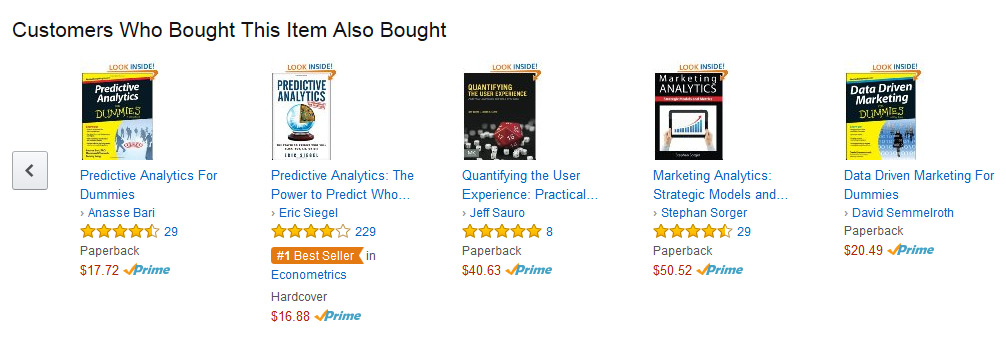

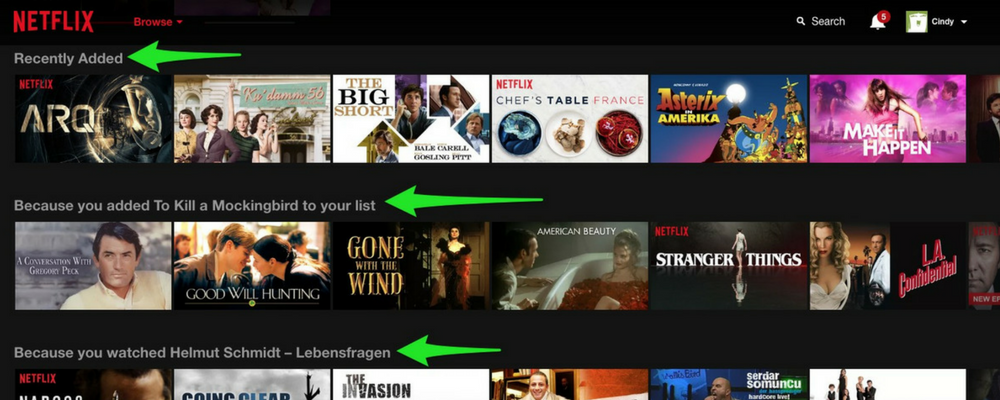

## Our main problem: _Sparsity_

- The thing is: we cannot expect that users will interact with most items;
    - Nobody has watched the whole (or the vast majority of the) catalogue of Netflix videos;
        - Hopefully!
    - Clients don't buy the majority of items in Amazon;
    - Users don't listen to all the music in Spotify;
    

- Hence, the utility matrix usually has tons of missing data;

## What do we want?

- Do we want to predict the missing ratings?

- Or do we want to find items that the users will enjoy?

 - Aren't these problems equivalent? 

 - We must carefully consider what we want, so we can properly train our model!
     - but yes, our job for now is to try to fill **some** of the missing data in this matrix;

- There are different approaches to do so (which you learned yesterday): 
    - Content-based recommendations
    - Collaborative filtering

## Content-based recommendation (Review)

- Use knowledge of each item to recommend a similar one (item-based recommendation)

- Based on the features of the items and users. For example
    - movies: drama, comedy, horror, actors, director
    - books: math, languages, author, year, etc...
    - destinations: temperature, coast, mountains, price, distance, etc...
    - users: age, location, etc...

* If you read specific articles.
* The representations of these articles as vectors will be similar to some other article representations as vectors.
* A measure like cosine similarity is used to find similar articles.
* These similar articles are then recommended to you if you haven’t read them to improve your engagement with the website or article medium.

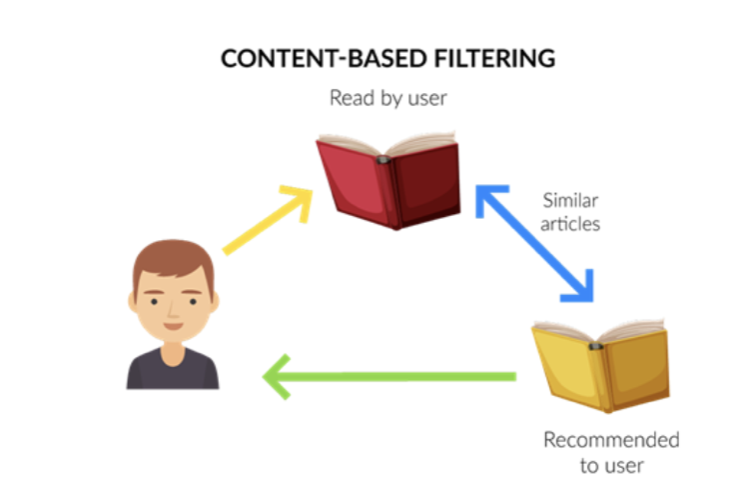

#### Advantages

- You don't need a lot of users to train your model.


- Each user is modeled separately, so you might be able to capture uniqueness of taste.


- Since you can obtain the features of the items, you can immediately recommend new items.


- You can explain to the users why you are recommending an item.

#### Disadvantages

- Feature acquisition:
    - What features should you use to explain the different ratings?
    - Obtaining those features for each item might be very expensive. 
       <br>  <br>
- Low diversity: hardly recommend an item outside the user's profile.
    - What if a user has an eclectic taste?
 <br>  <br>
- Cold start: you don't have any information about new users, what to do?


# Guided Activity - Dating App Part I

The goal here is to use content based recommendations to find a guy for 10 of the girls on the OKCupid dataset based on age, substance use and income.

In [1]:
#Dependencies
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

In [2]:
# Load Data Set
df = pd.read_csv('data/okcupid_profiles.csv')
df.head()

age     status sex orientation       body_type               diet  \
0   22     single   m    straight  a little extra  strictly anything   
1   35     single   m    straight         average       mostly other   
2   38  available   m    straight            thin           anything   
3   23     single   m    straight            thin         vegetarian   
4   29     single   m    straight        athletic                NaN   

     drinks      drugs                          education  \
0  socially      never      working on college/university   
1     often  sometimes              working on space camp   
2  socially        NaN     graduated from masters program   
3  socially        NaN      working on college/university   
4  socially      never  graduated from college/university   

             ethnicity  ...  \
0         asian, white  ...   
1                white  ...   
2                  NaN  ...   
3                white  ...   
4  asian, black, other  ...   

                                              essay0  \
0  about me:  i would love to think that i was so...   
1  i am a chef: this is what that means. 1. i am ...   
2  i'm not ashamed of much, but writing public te...   
3          i work in a library and go to school. . .   
4  hey how's it going? currently vague on the pro...   

                                              essay1  \
0  currently working as an international agent fo...   
1  dedicating everyday to being an unbelievable b...   
2  i make nerdy software for musicians, artists, ...   
3          reading things written by old dead people   
4                         work work work work + play   

                                              essay2  \
0  making people laugh. ranting about a good salt...   
1  being silly. having ridiculous amonts of fun w...   
2  improvising in different contexts. alternating...   
3  playing synthesizers and organizing books acco...   
4  creating imagery to look at: http://bagsbrown....   

                                              essay3  \
0  the way i look. i am a six foot half asian, ha...   
1                                                NaN   
2  my large jaw and large glasses are the physica...   
3                  socially awkward but i do my best   
4            i smile a lot and my inquisitive nature   

                                              essay4  \
0  books: absurdistan, the republic, of mice and ...   
1  i am die hard christopher moore fan. i don't r...   
2  okay this is where the cultural matrix gets so...   
3  bataille, celine, beckett. . . lynch, jarmusch...   
4  music: bands, rappers, musicians at the moment...   

                                              essay5  \
0                  food. water. cell phone. shelter.   
1  delicious porkness in all of its glories. my b...   
2  movement conversation creation contemplation t...   
3                                                NaN   
4                                                NaN   

                        essay6  \
0  duality and humorous things   
1                          NaN   
2                          NaN   
3   cats and german philosophy   
4                          NaN   

                                              essay7  \
0  trying to find someone to hang out with. i am ...   
1                                                NaN   
2  viewing. listening. dancing. talking. drinking...   
3                                                NaN   
4                                                NaN   

                                              essay8  \
0  i am new to california and looking for someone...   
1  i am very open and will share just about anyth...   
2  when i was five years old, i was known as "the...   
3                                                NaN   
4                                                NaN   

                                              essay9  
0  you want to be swept off your feet! you are ti...  
1    

In [3]:
#Process Data, Get useful rows and columns
df_new = df[(df['orientation']=='straight') & (df['status']=='single')]
df_new = df_new[['age', 'sex','smokes', 'drinks', 'income', 'drugs']]
df_new.dropna(inplace=True)
df_new.head()

age sex     smokes      drinks  income      drugs
0   22   m  sometimes    socially      -1      never
1   35   m         no       often   80000  sometimes
4   29   m         no    socially      -1      never
7   31   f         no    socially      -1      never
9   37   m         no  not at all      -1      never

In [4]:
#Create Map - smokes
keys = df_new['smokes'].unique()
values = [3,0,1,2,4]
smoke_map = dict(zip(keys, values))

print(keys)
print(values)
print(smoke_map)

['sometimes' 'no' 'trying to quit' 'when drinking' 'yes']
[3, 0, 1, 2, 4]
{'sometimes': 3, 'no': 0, 'trying to quit': 1, 'when drinking': 2, 'yes': 4}


In [5]:
#Create Map - drinks
keys = df_new['drinks'].unique()
values = [2,3,0,1,5,4]
drink_map = dict(zip(keys, values))

print(keys)
print(values)
print(drink_map)

['socially' 'often' 'not at all' 'rarely' 'desperately' 'very often']
[2, 3, 0, 1, 5, 4]
{'socially': 2, 'often': 3, 'not at all': 0, 'rarely': 1, 'desperately': 5, 'very often': 4}


In [6]:
#Create Map - drugs
keys = df_new['drugs'].unique()
values = [0,1,2]
drug_map = dict(zip(keys, values))

print(keys)
print(values)
print(drug_map)

['never' 'sometimes' 'often']
[0, 1, 2]
{'never': 0, 'sometimes': 1, 'often': 2}


In [7]:
#Apply Map
df_new['smokes'] = df_new['smokes'].map(smoke_map)
df_new['drinks'] = df_new['drinks'].map(drink_map)
df_new['drugs'] = df_new['drugs'].map(drug_map)
df_new.head()

age sex  smokes  drinks  income  drugs
0   22   m       3       2      -1      0
1   35   m       0       3   80000      1
4   29   m       0       2      -1      0
7   31   f       0       2      -1      0
9   37   m       0       0      -1      0

In [8]:
#Grab Males + IDs
males = df_new[df_new['sex'] == 'm']
males.drop(['sex'], axis=1, inplace=True)
m_list = males.index
males

C:\Users\User\AppData\Local\Temp\ipykernel_4552\331722166.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  males.drop(['sex'], axis=1, inplace=True)


age  smokes  drinks  income  drugs
0       22       3       2      -1      0
1       35       0       3   80000      1
4       29       0       2      -1      0
9       37       0       0      -1      0
18      31       0       1      -1      0
...    ...     ...     ...     ...    ...
59932   21       4       2      -1      1
59939   52       0       2      -1      0
59942   24       0       3      -1      1
59943   42       0       0  100000      0
59944   27       1       2      -1      2

[20201 rows x 5 columns]

In [9]:
#Grab 10 Females + IDs
females = df_new[df_new['sex'] == 'f'][:10]
females.drop(['sex'], axis=1, inplace=True)
f_list = females.index

In [10]:
#Similarity Score
similarity_matrix = cosine_similarity(females,males)
similarity_matrix

array([[ 0.99049777, -0.03173569,  0.99998776, ...,  0.99731494,
        -0.03175556,  0.99655508],
       [-0.04381923,  0.99999984, -0.03337907, ..., -0.04027556,
         0.99999983, -0.03578746],
       [-0.04423569,  0.99999999, -0.03379967, ..., -0.04069492,
         0.99999999, -0.03620658],
       ...,
       [ 0.99087262, -0.04925188,  0.99940881, ...,  0.99880889,
        -0.049273  ,  0.99620054],
       [ 0.99080362, -0.03788131,  0.99996095, ...,  0.99801427,
        -0.03790162,  0.99660632],
       [ 0.9971424 , -0.03267704,  0.99387472, ...,  0.99088108,
        -0.03269608,  0.99639988]])

In [11]:
similarity_matrix.shape

(10, 20201)

In [12]:
#Putting Matches Together
couples = []
for i, a in enumerate(similarity_matrix):
  m = np.where(a == max(a))
  couple = [list(m_list[m])[0]]
  couple.append(f_list[i])
  couples.append(couple)

In [13]:
print(couples)

[[660, 7], [2127, 13], [813, 14], [356, 17], [31, 20], [27, 21], [453, 32], [2449, 33], [356, 49], [27455, 67]]


In [14]:
#Output Matches
for couple in couples:
  display(df.iloc[couple])
  print ('\n')

age  status sex orientation body_type             diet    drinks  drugs  \
660   31  single   m    straight       fit  mostly anything  socially  never   
7     31  single   f    straight   average  mostly anything  socially  never   

                             education ethnicity  ...  \
660     graduated from masters program     white  ...   
7    graduated from college/university     white  ...   

                                                essay0  \
660  confident, genuine, and happy midwestern trans...   
7                                                  NaN   

                                                essay1  \
660  creative director and designer for a start-up ...   
7    writing. meeting new people, spending time wit...   

                                                essay2  \
660  problem solving. you name it, i can fix it, or...   
7    remembering people's birthdays, sending cards,...   

                                                essay3  \
660  physically: my blue eyes, my smile, or my ass....   
7    i'm rather approachable (a byproduct of being ...   

                                                essay4  \
660  i will give anything a first taste; just expec...   
7    i like: alphabetized lists, aquariums, autobio...   

                                                essay5  \
660  adulation (love), ally (friends), miniature go...   
7    friends, family, notebook/pen, books, music, t...   

                               essay6  \
660                               ...   
7    things that amuse and inspire me   

                                                essay7  \
660  nothing about me or my life is typical, but i ...   
7    out and about or relaxing at home with a good ...   

                                                essay8  \
660  i have no problem eating a pineapple if it lan...   
7                                                  NaN   

                                                essay9  
660  you desire to get to know me, and are availabl...  
7                                                  NaN  

[2 rows x 31 columns]

age  status sex orientation body_type             diet    drinks  drugs  \
2127   30  single   m    straight   average              NaN  socially  never   
13     30  single   f    straight    skinny  mostly anything  socially  never   

                        education ethnicity  ...  \
2127  working on two-year college     black  ...   
13     graduated from high school     white  ...   

                                                 essay0  \
2127  please dont let my name confuse you. im no pla...   
13                                                  NaN   

                                                 essay1  \
2127  im a property manager in san francisco and i f...   
13                                                  NaN   

                                                 essay2  \
2127  im good with computer hardware and troubleshoo...   
13                                                  NaN   

                                   essay3  \
2127  im very observant. i see everything   
13                                    NaN   

                                                 essay4  \
2127  i like movies man on fire, forrest gump, the g...   
13                                                  NaN   

                                               essay5                  essay6  \
2127  my computer my tv my dog chicken family the sun  making my own business   
13                                                NaN                     NaN   

                                                 essay7  \
2127  at home if nothing is happening. im over the n...   
13                                                  NaN   

                                  essay8                        essay9  
2127  i watched all of dawsons creek. =(  if your interested hit me up  
13                                   NaN                           NaN  

[2 rows x 31 columns]

age  status sex orientation       body_type             diet    drinks  \
813   29  single   m    straight  a little extra         anything  socially   
14    29  single   f    straight            thin  mostly anything  socially   

     drugs                      education                ethnicity  ...  \
813  never     graduated from high school         hispanic / latin  ...   
14   never  working on college/university  hispanic / latin, white  ...   

                                                essay0  \
813  i am a 28 year old mexican guy i am 6 feet tal...   
14                                                 NaN   

                                                essay1  \
813           i'm working and getting my life straight   
14   i have an awesome career working as a senior m...   

                                                essay2  \
813  anything i set my mind too. i'm good at footba...   
14   listening. helping others. being patient. comm...   

                                                essay3  \
813                                my nice personality   
14   well, i get the most compliments on my butt, s...   

                                                essay4  \
813  my favorite movies would be the hangover part ...   
14   books: my all-time favorite book is george orw...   

                                                essay5  \
813                my iphone, music, my cars, football   
14   1. my family 2. italian or mexican food 3. my ...   

                                                essay6  \
813                                               life   
14   to be honest, i spend way too much time thinki...   

                                                essay7  \
813  hanging out with my cousins and brothers or go...   
14   unwinding from my work week. hanging out with ...   

                                                essay8  \
813                                  i'll tell u later   
14   hmmm...not sure if i want to admit this, but p...   

                                                essay9  
813  you would like to get to know a genuine guy th...  
14        ...you genuinely think we'd be a good match.  

[2 rows x 31 columns]

age  status sex orientation body_type               diet    drinks  \
356   26  single   m    straight       fit  mostly vegetarian  socially   
17    26  single   f    straight   average                NaN  socially   

     drugs                          education         ethnicity  ...  \
356  never  graduated from college/university             white  ...   
17   never      working on college/university  hispanic / latin  ...   

                                                essay0  \
356  a swirl of words i identify with: harpsichords...   
17   to sum myself in whole: i have adventurous ten...   

                                                essay1  \
356  i have a radio show (old school fm not interne...   
17   i'm currently studying and majoring in crimina...   

                                                essay2  \
356  making mix tapes finding rare music or films r...   
17   hmm...i know i can take a test rather well.;) ...   

                                                essay3  \
356  i posed this question to my friends and they r...   
17   physically-i've been told my eyes. people usua...   

                                                essay4  \
356  books: nonfiction: "fooled by randomness" (tal...   
17   i'm much more of a movie goer. favorite actor:...   

                                                essay5  \
356  laughter my music gear/studio finding new stuf...   
17   my cellphone eye liner food wallet jacket a go...   

                                                essay6  \
356  time,conciseness, efficiency, how things were ...   
17   my next big vacation! who knows....maybe if i ...   

                                                essay7  \
356  at art murmur in oakland, at a friend's dance/...   
17   working out at the gym, sometimes watching a m...   

                                                essay8  \
356  i once had a mullet. i get vertigo in omni the...   
17   i could beat you at a game of hold em'.....try...   

                                                essay9  
356  points! a person's brain / their mental dispos...  
17   you're interested?  and you also thought ophel...  

[2 rows x 31 columns]

age  status sex orientation body_type             diet    drinks  drugs  \
31   27  single   m    straight  athletic         anything  socially  never   
20   27  single   f    straight   average  mostly anything  socially  never   

                            education ethnicity  ...  \
31  graduated from college/university       NaN  ...   
20  graduated from college/university     white  ...   

                                               essay0  \
31  to life, love and loot  i like smart, funny, a...   
20  i grew up in a small town in the midwest and h...   

                                               essay1  \
31  im a founding partner and product manager at a...   
20  i work for an international packaging design a...   

                                               essay2  \
31  making people laugh :)  or making an ass out o...   
20  laughing? someone once told me i was an ego-bo...   

                          essay3  \
31  my eyes. they're very green.   
20                           NaN   

                                               essay4  \
31  i love tv, i love movies, and i love to read. ...   
20                                                NaN   

                                               essay5  \
31  1. great food 2. big dreams 3. people smarter ...   
20  fam, friends, music, tacos, passport, nitrous ...   

                                               essay6  \
31  design, art, politics, movies, games, food!!  ...   
20  where will my next trip be? when will i grow u...   

                                               essay7  \
31  working with friends while having a beer tryin...   
20  out with friends for happy hour which usually ...   

                                               essay8  \
31  sometimes i'm still afraid of the dark. i've s...   
20                  i'm terrified of parallel parking   

                                               essay9  
31  if you like good conversation.  it may not end...  
20  you're awesome, have a sense of humor, think w...  

[2 rows x 31 columns]

age  status sex orientation body_type      diet    drinks  drugs  \
27   22  single   m    straight   average  anything  socially  never   
21   22  single   f    straight  athletic       NaN  socially  never   

                        education ethnicity  ...  \
27                            NaN     asian  ...   
21  working on college/university       NaN  ...   

                                               essay0  \
27  i suck at these things, but here it goes. i'm ...   
21  my name is ashley and i live in san francisco....   

                                               essay1  \
27  currently just working a full time job and han...   
21  i just graduated from usf with a major in inte...   

                             essay2  \
27  hmm i'm good at alot of things.   
21                              NaN   

                                        essay3  \
27                              my spiky hair?   
21  my smile. my eyes, and my hair apparently.   

                                               essay4 essay5  \
27  i have read all the harry potter, lord of the ...    NaN   
21  i'm not picky...but i tend to enjoy comedies, ...    NaN   

                                               essay6  \
27  a little bit of everything! where im going to ...   
21                                                NaN   

                                               essay7  \
27  if im not working im usually out hanging with ...   
21                going out in the city with friends.   

                       essay8  \
27  i have a okcupid account!   
21                        NaN   

                                               essay9  
27      you want to get to know me better or hang out  
21  -you like to be happy and have fun. -you are a...  

[2 rows x 31 columns]

age  status sex orientation body_type               diet    drinks  \
453   38  single   m    straight  athletic  mostly vegetarian  socially   
32    38  single   f    straight   average    mostly anything  socially   

     drugs                          education ethnicity  ...  \
453  never                                NaN     white  ...   
32   never  graduated from college/university     white  ...   

                                                essay0  \
453  whoooaa, been in sf 6yrs, moved from london, l...   
32   much more to add, but this is a start...  i am...   

                                                essay1  \
453  i am self employed general contractor, that ke...   
32                                                 NaN   

                                                essay2  \
453                                         thinking..   
32   using spell check being a goofball. building r...   

                                                essay3  \
453  is that an accent!? no i,m pretending to be fo...   
32                                i'm guessing my hair   

                                                essay4  \
453  star of the sea, off the grid ,long walk to fr...   
32                                                 NaN   

                                                essay5              essay6  \
453  good food friends family my health free time m...  what its all about   
32   my how this has changed throughout the years.....                 NaN   

    essay7                                             essay8    essay9  
453    NaN  despite my alleged eco conciousness i just bou...  you wana  
32     NaN                                                NaN       NaN  

[2 rows x 31 columns]

age  status sex orientation body_type               diet    drinks  \
2449   20  single   m    straight       NaN    mostly anything  socially   
33     20  single   f    straight   average  mostly vegetarian  socially   

      drugs                      education ethnicity  ...  \
2449  never  working on college/university     white  ...   
33    never  working on college/university       NaN  ...   

                                                 essay0  \
2449  hey, i'm alex! i'm a bit of a geek, but i'm fa...   
33    "apparently," has become a new favorite word o...   

                                                 essay1  \
2449  i'm spending the summer up here in the bay are...   
33    working at a doggy daycare. it's really fun an...   

                                                 essay2  \
2449    coming up with crazy ideas, thus the dreamer :)   
33    being a girl... cooking vegetarian cuisine and...   

                                                 essay3  \
2449  my energetic personality, or that i really lik...   
33    people start speaking to me in spanish and i r...   

                                                 essay4  \
2449  food: i'm up for trying almost anything, but i...   
33    everything, yo. i really enjoy non-fiction stu...   

                                                 essay5  \
2449  first and foremost is my family and friends. i...   
33    i can't choose. please don't let me choose... ...   

                                                 essay6  \
2449  my future, how to make some of my ideas work, ...   
33    what daydreamers only think about.  moving to ...   

                                                 essay7  \
2449  either out with friends or staying in working ...   
33    it varies! i work on my friday nights but if t...   

                                                 essay8  \
2449  i think that a man's manners should include wh...   
33    i turn 21 on july 1st. give me money and gifts...   

                                                 essay9  
2449  you want to hang out or get to know me better,...  
33    you wanna get guatemalan food with me in the m...  

[2 rows x 31 columns]

age  status sex orientation body_type               diet    drinks  \
356   26  single   m    straight       fit  mostly vegetarian  socially   
49    26  single   f    straight  athletic    mostly anything  socially   

     drugs                          education ethnicity  ...  \
356  never  graduated from college/university     white  ...   
49   never  graduated from college/university     white  ...   

                                                essay0  \
356  a swirl of words i identify with: harpsichords...   
49                                                 NaN   

                                                essay1  \
356  i have a radio show (old school fm not interne...   
49                                                 NaN   

                                                essay2  \
356  making mix tapes finding rare music or films r...   
49                                                 NaN   

                                                essay3  \
356  i posed this question to my friends and they r...   
49                                                 NaN   

                                                essay4  \
356  books: nonfiction: "fooled by randomness" (tal...   
49                                                 NaN   

                                                essay5  \
356  laughter my music gear/studio finding new stuf...   
49   concerts running hanging out with friends and ...   

                                                essay6  \
356  time,conciseness, efficiency, how things were ...   
49                                                 NaN   

                                                essay7  \
356  at art murmur in oakland, at a friend's dance/...   
49                                                 NaN   

                                                essay8  \
356  i once had a mullet. i get vertigo in omni the...   
49                                                 NaN   

                                                essay9  
356  points! a person's brain / their mental dispos...  
49                                                 NaN  

[2 rows x 31 columns]

age  status sex orientation body_type      diet  drinks      drugs  \
27455   30  single   m    straight   used up  anything  rarely  sometimes   
67      30  single   f    straight      thin       NaN  rarely  sometimes   

                            education                      ethnicity  ...  \
27455  graduated from masters program                          white  ...   
67      working on college/university  black, native american, white  ...   

                                                  essay0  \
27455                                       mostly water   
67     above all else i am, and always have been, a g...   

                                                  essay1  \
27455                                 grasping at straws   
67     i am currently studying early childhood develo...   

                                                  essay2  \
27455  this new sport i invented, citroll. you try it...   
67     always being true to myself, and making no apo...   

                                                  essay3  \
27455                i'm singing in a quavering falsetto   
67     i dunno... a lot of people point out my good p...   

                                                  essay4  \
27455  delillo, dfw, thomas pynchon, jonathan lethem,...   
67     books: lately a lot of my reading has been for...   

                                                  essay5  \
27455  rza, gza, ghostface, raekwon, odb, and method ...   
67     love hope faith family (no matter what i try, ...   

                                                  essay6  \
27455                                      signal chains   
67     how i should not spend so much time in my head...   

                                                  essay7  \
27455  playing a show or recording or making software...   
67     usually i am studying, working on any number o...   

                                                  essay8  \
27455  really more of a neil fan, actually. but yeiln...   
67     i suffer from a debilitating disorder that for...   

                                                  essay9  
27455                you are like, articulate and stuff.  
67     you are compelled to in any way and want to ge...  

[2 rows x 31 columns]

## Collaborative Filtering: Memory Based Approach
- User-user
- Item-item
- Latent-factors

Memory-based collaborative filtering computes similarities between users or items and predicts a new rating for an item by taking the weighted average of ratings from the similar group. 
<br><br>

- Use knowledge of a user’s past selections to recommend what similar users did (user-based recommendation).
<br><br>
- For item-based filtering: “users who preferred a certain item also liked…”
<br><br>
- The recommendations will be based on the utility matrix.
<br><br>
- The idea is to find similar items or similar users to make your recommendations, hence collaborative.

Ratings | Notting Hill | Jurassic Park | Rocky Balboa IV | Bird Box | Inglorious Basterds
--------|--------------|---------------|-----------------|----------|----------------------
User 1  |      ?       |      ?        |       2         |    ?     |    3 
User 2  |      3       |      ?        |       ?         |    ?     |    ?
User 3  |      ?       |      4        |       5         |    ?     |    5
User 4  |      ?       |      ?        |       ?         |    ?     |    ?
User 5  |      ?       |      ?        |       ?         |    5     |    ?

### User-to-user

User-based filtering first selects a user and finds users who have similar rating patterns. The recommender system then can suggest items that those similar users liked.

* The process is to calculate the similarities between target user i and all other users, select the top X similar users, and take the weighted average of ratings from these X users with similarities as weights.
<br><br>
* While different people may have different baselines when giving ratings, some people tend to give high scores generally, some are pretty strict even though they are satisfied with items. To avoid this bias, we can subtract each user’s average rating of all items when computing weighted average, and add it back for target user.


- Suppose you want to predict the rating that Sophie would give to Shrek.

- Here is one approach:
    1. Calculate the similarity of Sophie with each one of the users.
    3. Next, select the $k$ users that are most similar to Sophie and also rated Shrek.
    2. Aggregate their ratings.

### Item-to-item

- Item-based filtering takes an item first and finds users who liked the particular item, then searches other items that those users also liked.

- Item based collaborative filtering was introduced 1998 by Amazon. 

- Item based filtering looks at the similarity between different items, and does this by taking note of how many users that chose item X also chose item Y. 

- If the correlation is high enough, a connection can be presumed to exist between the two items, and they can be assumed to be similar to one another.

* E.g. Suppose you want to predict the rating that a user (Sophie) would give to a movie (Shrek)


- Here is one approach:
    1. Calculate the similarity between Shrek and each one of the movies in our matrix.
    2. Next, select the $k$ movies that are  most similar to Shrek and that were also rated by Sophie.
    3. Aggregate these ratings.

## Guided Activity: Dating App Part II

Let's use collaborative filtering to pick out 10 girls for 10 guys based on how compatible similar guys were with the girls.

In [14]:
#Dependencies
import seaborn as sns
from sklearn.cluster import KMeans 

In [15]:
# Cluster Guys profiles
model = KMeans(10)
model.fit(males)

KMeans(n_clusters=10)

In [16]:
#Update df
males['cluster'] = model.predict(males)
males['id'] = m_list
males.groupby(['cluster']).size()

C:\Users\Brian.Lynch\AppData\Local\Temp\ipykernel_29892\498591389.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  males['cluster'] = model.predict(males)
C:\Users\Brian.Lynch\AppData\Local\Temp\ipykernel_29892\498591389.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  males['id'] = m_list


cluster
0    14610
1      230
2      927
3      102
4      778
5       28
6      385
7     1226
8      971
9      944
dtype: int64

In [31]:
#Picking Guy from each Cluster
bachelors = males.groupby(['cluster']).first()
bachelors

age  smokes  drinks   income  drugs   id
cluster                                          
0         22       3       2       -1      0    0
1         41       0       2  1000000      2  102
2         34       0       2   100000      0   82
3         29       2       3   250000      0  177
4         24       0       2    60000      0  145
5         21       0       1   500000      0  107
6         35       0       2   150000      1   72
7         22       0       1    20000      0   66
8         35       0       3    80000      1    1
9         29       0       2    40000      1   94

In [38]:
#Removing Bachelor above from his cluster
guy_group = pd.merge(males, bachelors, how='outer', indicator=True)
new_guy_group = guy_group.loc[guy_group._merge == 'left_only']
new_guy_group.drop(['_merge'], axis=1, inplace =True)
new_guy_group.head()

C:\Users\Brian.Lynch\AppData\Local\Temp\ipykernel_29892\2319744265.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_guy_group.drop(['_merge'], axis=1, inplace =True)


age  smokes  drinks  income  drugs  cluster  id
2   29       0       2      -1      0        0   4
3   37       0       0      -1      0        0   9
4   31       0       1      -1      0        0  18
5   33       0       2      -1      0        0  19
6   30       0       2      -1      0        0  22

In [85]:
#Assemble All girls 
females = df_new[df_new['sex'] == 'f']
females.drop(['sex'], axis=1, inplace=True)
f_list = females.index

C:\Users\Brian.Lynch\AppData\Local\Temp\ipykernel_29892\614955132.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  females.drop(['sex'], axis=1, inplace=True)


In [43]:
#Similarity Matrix
similarity_matrix = cosine_similarity(new_guy_group.iloc[:, :5],females)
similarity_matrix

(20191, 14310)

In [21]:
groups = list(new_guy_group.groupby(['cluster']).size())
groups.insert(0,0)
print(groups)

[0, 14609, 229, 926, 101, 777, 27, 384, 1225, 970, 943]


In [42]:
#Sectioning off the scores of each cluster
grouping = []
for i in range(len(groups)-1):
  group = similarity_matrix[groups[i]:groups[i] + groups[i+1]]
  grouping.append(group)

(14609, 14310)

In [23]:
print (len(grouping))

10


In [90]:
# Decide which girls each group liked by finding the maximum of their average rating
couples = []
for women in grouping:
  avg = np.mean(women,axis=0)
  best = np.where(avg == max(avg))
  couples.append(list(f_list[best]))

In [91]:
#Putting Couples together by couple ID
for i in range(len(couples)):
  couples[i].append(bachelors['id'][i])

In [92]:
couples

[[57005, 0],
 [57005, 102],
 [57005, 82],
 [57005, 177],
 [57005, 145],
 [59740, 107],
 [57005, 72],
 [57005, 66],
 [57005, 1],
 [57005, 94]]

In [27]:
# Show pairings
for couple in couples:
  display(df.iloc[couple])
  print ('\n')

age  status sex orientation       body_type               diet  \
10317   46  single   f    straight           curvy                NaN   
0       22  single   m    straight  a little extra  strictly anything   

         drinks  drugs                      education     ethnicity  ...  \
10317  socially  never                            NaN         black  ...   
0      socially  never  working on college/university  asian, white  ...   

                                                  essay0  \
10317  about me? well it's really hard to describe on...   
0      about me:  i would love to think that i was so...   

                                                  essay1  \
10317  i'm at very confortable state in my life right...   
0      currently working as an international agent fo...   

                                                  essay2  \
10317  cherishing and fostering friendship! i love pe...   
0      making people laugh. ranting about a good salt...   

                                                  essay3  \
10317    my smile, openness, friendliness, cheerfulness.   
0      the way i look. i am a six foot half asian, ha...   

                                                  essay4  \
10317  philosophy books, action movies, alternative r...   
0      books: absurdistan, the republic, of mice and ...   

                                                  essay5  \
10317  family, friends, faith, music, good health, an...   
0                      food. water. cell phone. shelter.   

                                 essay6  \
10317  family and friends and travling.   
0           duality and humorous things   

                                                  essay7  \
10317  hanging out with my friends or entertaining my...   
0      trying to find someone to hang out with. i am ...   

                                                  essay8  \
10317             i'm not saying any private thing (lol)   
0      i am new to california and looking for someone...   

                                                  essay9  
10317             you are looking for a real friendship!  
0      you want to be swept off your feet! you are ti...  

[2 rows x 31 columns]

age  status sex orientation body_type               diet    drinks  \
205   43  single   f    straight     curvy  strictly anything  socially   
102   41  single   m    straight  athletic    mostly anything  socially   

     drugs                  education ethnicity  ...  \
205  never  graduated from law school     white  ...   
102  often      working on space camp     white  ...   

                                                essay0  \
205  i'm a writer. i do other stuff for a paycheck,...   
102  i'm on a temporary hiatus from trying to defin...   

                                                essay1  \
205  i have a job. i'm good at it. and i write beca...   
102  for a living? teaching cpr, first aid, and ass...   

                                                essay2  \
205  having adventures, learning languages, helping...   
102  being unequivocal... sometimes.  public speaki...   

                                                essay3  \
205  that i look a lot younger. my hair. my ability...   
102                        that my green eyes are red.   

                                                essay4  \
205  writers: alice munro, tom robbins, kazuo ishig...   
102  when it comes to fiction, i like to read what ...   

                                                essay5  \
205  books, paper, music, friends, socks, peppermin...   
102  someday, i'll be a monk on a hill and all i'll...   

                                                essay6  \
205  motivation, perspective, fresh peaches and hum...   
102  human behavior. my goals. why i'm not further ...   

                                                essay7  \
205  writing or sleeping or out with friends or som...   
102  falling on my ass a hundred times (that means ...   

                                                essay8  \
205  i have blonde eyebrows. i am excellent with ey...   
102  how about some dealbreakers right up front... ...   

                                                essay9  
205  you're creative, funny, kind, honest, adventur...  
102  you like my words. you like my face. you'd lik...  

[2 rows x 31 columns]

age  status sex orientation body_type               diet    drinks  \
952   26  single   f    straight      thin  strictly anything  socially   
82    34  single   m    straight       fit           anything  socially   

         drugs                          education ethnicity  ...  \
952  sometimes  graduated from college/university     asian  ...   
82       never     graduated from masters program     white  ...   

                                                essay0  \
952  i'm warm, artistic, funny, and thoughtful. i'm...   
82   i moved to sf ~7 months ago, and so far i'm re...   

                                                essay1  \
952  right now i sling expensive shoes to gullible ...   
82   isn't this the million dollar question... work...   

                                                essay2  \
952  thrifting. eating obscene amounts of food. mak...   
82   solving problems, whatever life throws at me, ...   

                                                essay3  \
952                    if they're showing, my tattoos.   
82   my blue eyes, and that i look rather young for...   

                                                essay4  \
952  books: comic books, a song of ice and fire, da...   
82   adventure and scifi books thrillers and comedy...   

                                                essay5  \
952  looking at stupid and awesome shit on the inte...   
82   my passport a playful pet comfortable bed good...   

                                                essay6  \
952                                                NaN   
82   where i'm traveling to next, and where do i fi...   

                                                essay7  \
952                                                NaN   
82   i typically don't like "typical" nights... i'l...   

                                                essay8  \
952  i'm clumsy. embarrassingly so. like grownass a...   
82   i'm actually very open about things that perha...   

                                                essay9  
952  we have some stuff in common, you aren't lame,...  
82   if you love hiking/camping, traveling in 3rd-w...  

[2 rows x 31 columns]

age  status sex orientation       body_type               diet    drinks  \
346   43  single   f    straight             fit  strictly anything  socially   
177   29  single   m    straight  a little extra       mostly halal     often   

     drugs                   education ethnicity  ...  \
346  never                         NaN     white  ...   
177  never  dropped out of high school     white  ...   

                                                essay0  \
346  i told my brother-in-law (it guy) that i didn'...   
177  you might be wondering why my profile name is ...   

                                               essay1  \
346  working hard and working on playing hard harder.   
177                       being a bad ass mutha fucka   

                                                essay2  \
346  finding the humor in things and being super ch...   
177  -eating -drinking -sex  in that order...don't ...   

                                                essay3  \
346  what they tell me is that they think i am funn...   
177  -my hairy hairy chest -my strange stench...dai...   

                                                essay4  \
346  movies, i love movies and buttered popcorn.......   
177  food...all the rest of that is bullshit. see a...   

                                                essay5  \
346  or i don't want to anyway.... strong coffee fr...   
177  hmm...for all you lame-o romantics out there: ...   

                                                essay6  \
346  what sounds good to eat, when can i go on vaca...   
177                                                NaN   

                                                essay7  \
346            either out on the town or on the couch.   
177  -learning how to dive -working out at the gym ...   

                                                essay8  \
346                                                NaN   
177  sometimes i jack off while watching mad men......   

                                                essay9  
346                       you feel compelled to do so.  
177  you're a girl, you're hot, you're funny, you l...  

[2 rows x 31 columns]

age  status sex orientation body_type                 diet    drinks  \
238   22  single   f    straight   average  strictly vegetarian  socially   
145   24  single   m    straight    skinny                  NaN  socially   

     drugs                          education                ethnicity  ...  \
238  never         graduated from high school                    white  ...   
145  never  graduated from college/university  hispanic / latin, white  ...   

                                                essay0  \
238  new to the online dating and here to check thi...   
145  i just moved to sf from cincinnati. i was teac...   

                                                essay1  \
238  currently i am a full time hairstylist as well...   
145  i just finished two years as a high school mat...   

                                                essay2  \
238              educating, working hard and painting.   
145  listening, making people feel better, origami,...   

                                                essay3  \
238  my hair usually is the first thing people noti...   
145  my friendly demeanor, i always try to greet pe...   

                                                essay4  \
238  anything by palahniuk, orwell, huxley, vonnegu...   
145  books: anything by mitch albom, harry potter, ...   

                                                essay5  \
238  1. my cat baloo 2. my records 3. good food 4. ...   
145  computer/internet, my dog though he had to sta...   

                                                essay6  \
238                                                NaN   
145  life, the universe, and everything. also not s...   

                                                essay7  \
238  usually hanging out with friends or my coworke...   
145  watching college football at a bar; hanging ou...   

                                                essay8  \
238                               i crush on iggy pop.   
145  i watch and enjoy the tv show glee. since ther...   

                                                essay9  
238                  you like eccentric personalities.  
145  anything on this profile made you smile.  addi...  

[2 rows x 31 columns]

age  status sex orientation body_type             diet    drinks  \
98    31  single   f    straight     curvy         anything  socially   
107   21  single   m    straight  athletic  mostly anything    rarely   

         drugs                       education ethnicity  ...  \
98   sometimes  graduated from masters program     white  ...   
107      never           working on med school     white  ...   

                                                essay0  \
98   one day i will mod r/hotchickswithspreadsheets...   
107  hi, im sean, so these sites are always a wired...   

                                                essay1  \
98   presently, holyshitwhatamidoinghere and the sp...   
107  still going to school, but am currently workin...   

                                                essay2  \
98   algebra, alliteration, big spoon and little sp...   
107           talking to anyone, im pretty easy going!   

                                                essay3  \
98   i look a lot like that chick you banged your f...   
107                 im nice and easy to get along with   

                                  essay4  \
98   - wikipedia - yes - yes - yes - yes   
107                                  NaN   

                                                essay5  \
98   civility, hope, basic arithmetic, any of the v...   
107  being happy my phone my family my friends my life   

                                                essay6  \
98   macros. also, puppies. i worry about the futur...   
107                                                NaN   

                                                essay7  \
98                   home, high, and doing the dishes.   
107  out with the guys, figuring out something to d...   

                                                essay8  \
98   i'm terrible at small talk which makes for awk...   
107                                                NaN   

                                                essay9  
98                       you find challenge rewarding.  
107  you read all the way down to here, say somethi...  

[2 rows x 31 columns]

age  status sex orientation body_type             diet    drinks  \
460   22  single   f    straight   average  mostly anything  socially   
72    35  single   m    straight  athletic  mostly anything  socially   

         drugs                      education                ethnicity  ...  \
460      never  working on college/university  asian, pacific islander  ...   
72   sometimes      graduated from space camp   native american, white  ...   

                                                essay0  \
460  we only live once and thats why i live life to...   
72   i'm an adventurer first, i take calculated ris...   

                                                essay1  \
460  right now i'm a full time student, majoring in...   
72   photography, lights, and sound. i also throw s...   

                                                essay2  \
460  hmm.. observing people, listening, giving advi...   
72   pretty much anything i put my mind to... relat...   

                                                essay3  \
460  the first thing people notice about me i would...   
72           i have laser beams coming out of my eyes.   

                                                essay4  \
460  i have a lot of favorite books, it changes thr...   
72                                                 NaN   

                                                essay5  \
460  - family& friends - music - sketchbook - iphon...   
72   my camera, aviation, amazing food, touch, lear...   

                                                essay6  \
460  how i'll attain my goals and where i'll travel...   
72   travel, food, photography, sensual fun, aviati...   

                                                essay7  \
460  it depends, i'm either with friends catching u...   
72   often working a party. lights, sound, managing...   

                                         essay8  \
460  nothing haha get to know me to find out ;)   
72                                          NaN   

                                                essay9  
460  - if you want to get to know me - want to be f...  
72   you can make me laugh or turn me on. teach me ...  

[2 rows x 31 columns]

age  status sex orientation body_type               diet    drinks  \
287   49  single   f    straight   average  mostly vegetarian  socially   
66    22  single   m    straight  athletic    mostly anything    rarely   

         drugs                          education ethnicity  ...  \
287  sometimes  graduated from college/university     white  ...   
66       never      working on college/university     asian  ...   

                                                essay0  \
287  i am a creative, adventurous, mischievous yet ...   
66   it will be way too boring to just reveal yours...   

                                                essay1  \
287  i try to balance my life. i am blessed (and cu...   
66                                         work+school   

                                                essay2  \
287  being peaceful and living in the moment. admir...   
66                making bad jokes and being sarcastic   

                                                essay3  \
287  i suppose the first thing is my blonde hair an...   
66                                                 NaN   

                                                essay4  \
287  right now i'm reading "anthropologist on mars"...   
66        i like christopher nolan movies,,,and amelie   

                                               essay5  \
287    friends & family coffee music food my cats art   
66   cetaphil face wash phone internet family friends   

                                                essay6  \
287  currently - what to write in this essay...  in...   
66                          my life goals and a career   

                                                essay7  \
287  worn out from work and in the mood to drink so...   
66                                                 NaN   

                                                essay8  \
287  that, pedestrian as it is, spaghetti is my fav...   
66                                                 NaN   

                                                essay9  
287  you read what i wrote above and think we might...  
66                            just say hi..i dont bite  

[2 rows x 31 columns]

age  status sex orientation body_type               diet    drinks  \
317    29  single   f    straight     curvy  mostly vegetarian  socially   
2394   37  single   f    straight       fit    mostly anything  socially   
1      35  single   m    straight   average       mostly other     often   

          drugs                          education               ethnicity  \
317       never      working on college/university  black, native american   
2394      never  graduated from college/university                   white   
1     sometimes              working on space camp                   white   

      ...                                             essay0  \
317   ...  if you are anything like me, you probably look...   
2394  ...  i grew up an air force brat, moving every 3-4 ...   
1     ...  i am a chef: this is what that means. 1. i am ...   

                                                 essay1  \
317   i am a student and my major is business market...   
2394  trying to achieve a certain balance... to live...   
1     dedicating everyday to being an unbelievable b...   

                                                 essay2     essay3  \
317                                                 NaN  my smile.   
2394  coming up with witty user names, laughing and ...   my smile   
1     being silly. having ridiculous amonts of fun w...        NaN   

                                                 essay4  \
317   movies: truthfully, i love movies and there ar...   
2394  i love all food... (well almost) and i love to...   
1     i am die hard christopher moore fan. i don't r...   

                                                 essay5  \
317   the internet. a roof over my head. my friends ...   
2394  live music, yoga, the ocean, family, great fri...   
1     delicious porkness in all of its glories. my b...   

                                                 essay6  \
317     my future and what kind of life i want to have.   
2394  how to get more out of my day, to do and exper...   
1                                                   NaN   

                                                 essay7  \
317   at home or with friends. i am over the bar scene.   
2394  grabbing cocktails and dinner with friends, lo...   
1                                                   NaN   

                                                 essay8  \
317                                                 NaN   
2394                      i still really like coldplay.   
1     i am very open and will share just about anyth...   

                                                 essay9  
317   if you don't have a problem with other races a...  
2394  you like to have fun and can make me laugh. yo...  
1                                                   NaN  

[3 rows x 31 columns]

age  status sex orientation body_type                 diet    drinks  \
1491   40  single   f    straight  athletic                  NaN  socially   
3246   27  single   f    straight       fit  strictly vegetarian  socially   
94     29  single   m    straight       fit      mostly anything  socially   

          drugs                          education ethnicity  ...  \
1491      never  graduated from college/university     white  ...   
3246      never          graduated from law school     white  ...   
94    sometimes  graduated from college/university     white  ...   

                                                 essay0  \
1491  i am not very good about writing about myself ...   
3246  some people tend to think i'm very serious whe...   
94    my names josh, and i create art for a living. ...   

                                                 essay1  \
1491  having just turned 40, i have a new lease on l...   
3246  i'm a fairly new attorney, working in higher e...   
94                                            living it   

                                                 essay2  \
1491  i don't know that i would go as far as saying ...   
3246                figuring out personalities quickly.   
94                                           everything   

                                                 essay3  \
1491  my smile. i love laughing and being happy and ...   
3246                                          my smile.   
94                          i honestly couldn't say....   

                                                 essay4  \
1491  i do try to mix up my reading with murder/myst...   
3246  i love to read! anything and everything. one o...   
94    -books: anything joseph campbell - osho - terr...   

                                                 essay5  \
1491  my friends and family. they mean the world to ...   
3246   friends, family, beach, books, food, and animals   
94                                     invalid question   

                                                 essay6   essay7  \
1491                                                NaN      NaN   
3246  anything and everything. people, politics, it ...  varies.   
94                                            the world     out.   

                                                 essay8  \
1491                              we can discuss later.   
3246  i'm an open book. there's nothing that i am em...   
94                                                   no   

                                                 essay9  
1491                                                NaN  
3246  you are: open-minded, kind, witty, easy-going,...  
94                                      you're curious.  

[3 rows x 31 columns]

## Evaluating your recommender system (discussion)

- Assessment of a recommender system can be very tricky;


- Well, we can use the classical measures: mean squared error, mean absolute error;


- But these error measures might be misleading;


- What we actually want to measure is the interest that our user have on the recommended items;


### Remember that:

- Just training your model and evaluating it offline is not ideal.
<br><br>


- We don't have a ground truth! 


- Although we want to recommend only items the user is interested in, the recommended items might skew/affect the users interest;
    - we can't measure this offline;

- Because of this, one can argue that the best way of testing a recommender system is actually testing it for real (A/B test). 




### Besides...

- The fact that a user liked a movie, it doesn't mean he/she wants to watch a similar movie in sequence;
    - also hard to capture this offline;


- Suppose a user likes action and sci-fi movies. 


- After just watching an action movie, should we recommend similar action movies?

- **Diversity**: Our user is a Harry Potter fan, should we recommend HP1, HP2, HP3,...? We might want some diversity! To measure diversity you could user, for example,
$$
1 - \bar{S}
$$
where $\bar{S}$ is the average similarity of your recommendations; 
    - Careful though, you need a balance. Just going for diversity is pointless;

- **Novelty:** You want to indicate new items to your users or the most popular items? We need a balance here
    - Just going for popular items won't surprise your users;
    - Just going for new/unknown items affects the trust in your recommendation;
        - Besides, popular items are popular for a reason;

- **Responsiveness:** how fast does your system change as new user/items interactions arrive? 
    - In other words, how frequently should you update your utility matrix?
    
    
- **Persistence:** How long do you want to keep an item in your recommended list?

## Non-algorithmic recommendations bias

- There might be other reasons for you to recommend items;


- For example, Netflix might want to stimulate original productions;


- A company might want to favor a product with high profit margin;

#### Or you might want not recommend somethings

- [Is Target the new pregnancy test?](https://www.forbes.com/sites/kashmirhill/2012/02/16/how-target-figured-out-a-teen-girl-was-pregnant-before-her-father-did/#4d7f597f6668)
<br><br>
- [Walmart links Martin Luther King Jr. to “Planet of the Apes”](http://www.nbcnews.com/id/10730202/ns/technology_and_science-tech_and_gadgets/t/wal-mart-blames-human-error-offensive-link/#.XEamRc2IaUk)
<br><br>
- BE CAREFUL WITH SENSITIVE MATTERS!

### Types of data

- Explicit data: ratings, thumbs up, etc...


- Implicit data: collected from your behaviour (e.g., mouse clicks, purchases, time spent doing something)

- Users don't like to give explicit data
    - so companies use different strategies: (tag your photo, 10 years challenge?)
        - it is nice for you, so you do it;
        - but it is also nice for them;
        - Using these things without you knowing, is that ethical?
        


- Companies trust implicit data more, like time/money spent;

# REC LIST

RecList is an open source library providing behavioral, “black-box” testing for recommender systems. Inspired by the pioneering work of Ribeiro et al. 2020 in NLP, we introduce a general plug-and-play procedure to scale up behavioral testing, with an easy-to-extend interface for custom use cases.

Paper: https://arxiv.org/pdf/2111.09963.pdf

Site: https://reclist.io/

## Model Based Collaborative Filtering

Our task: decreases the dimension of the utility matrix A by extracting its latent factors



### Latent factors
- Latent factors are the characteristics of the items, for example, the genre of the music, the genre of the movie... 

Example of Matrix Factorization using PCA 

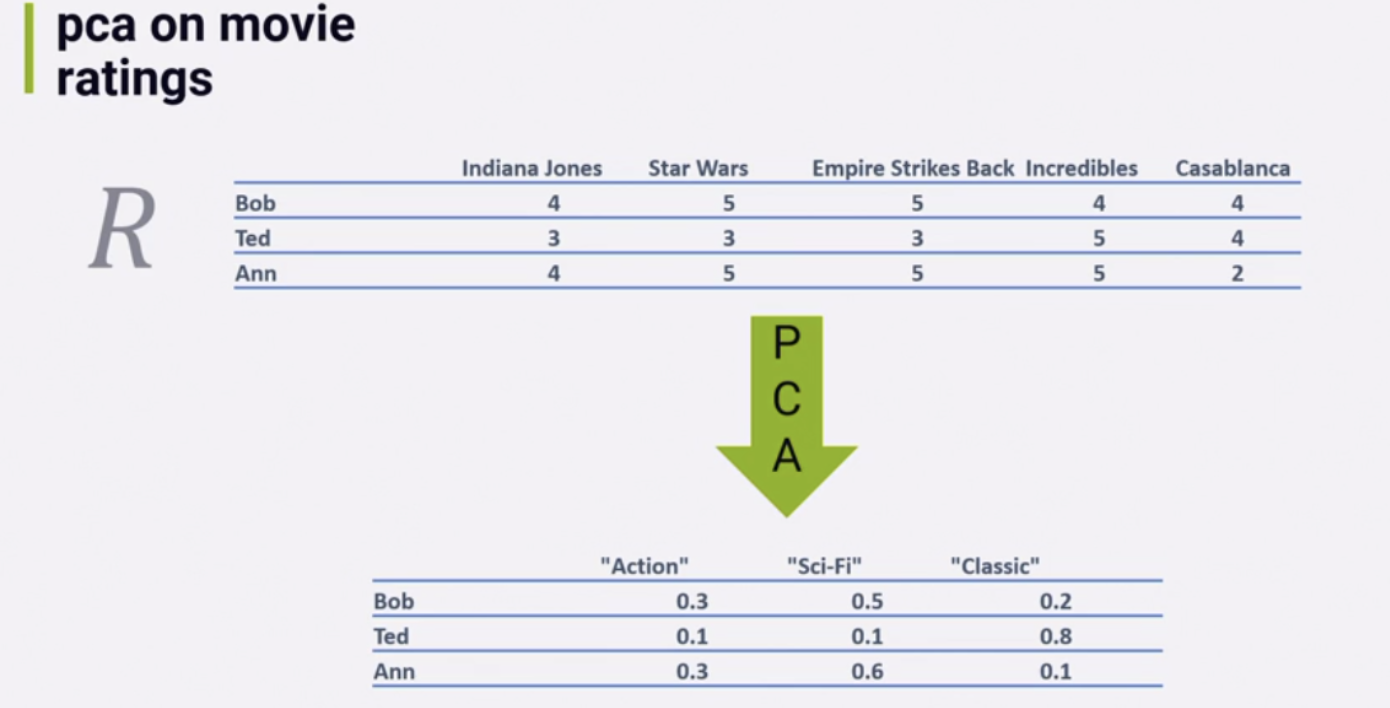

We are going to do this using `Matrix Factorization` reducing the `Movie Ratings Matrix` into `Movies` and `Users Matrix`.

These Matrices will be dense representations of the Movie Ratings Matrix.


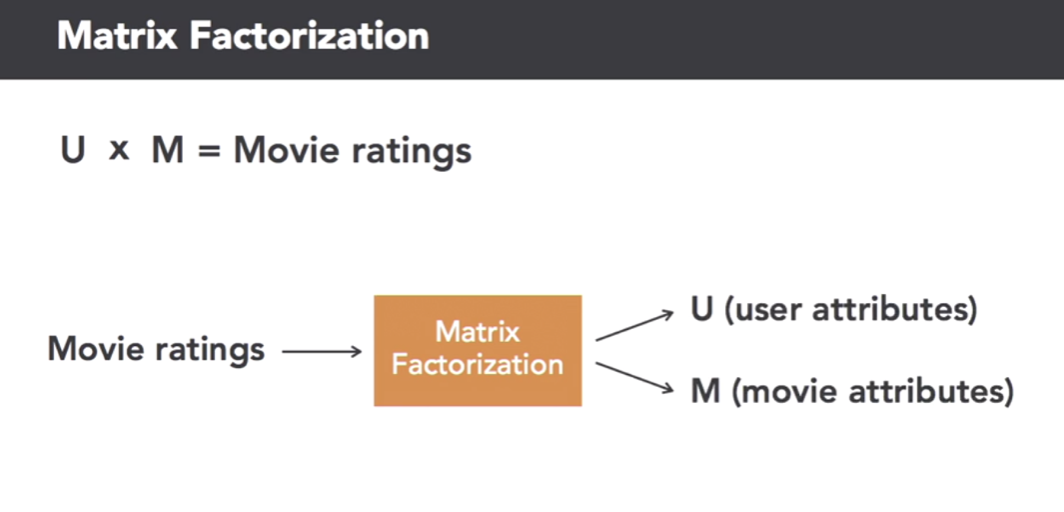


### How our data looks like?

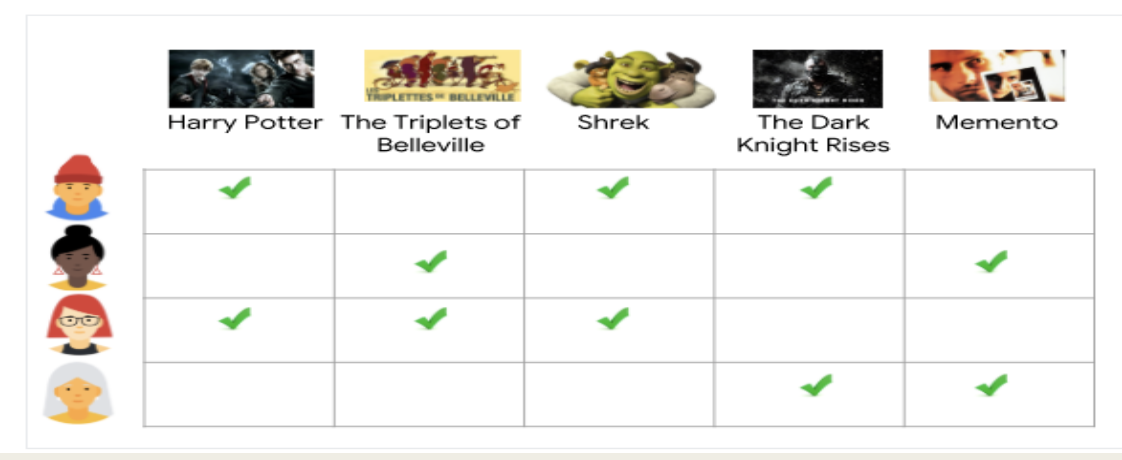

- We've seen that if we had the user profile, we can learn the movie profile $\hat{X}$ 

- Or if we had the movie profile, we could learn the user profile $\hat{\beta}$

- We have a similar problem, but instead of minimizing on either $X$ or $\beta$, we need to minimize on both!!

### Visual SVD

Each movies has different genres like comedy and action with a specified rating precalculated.

User also has a preference for these genres like ‘I like comedy or I dislike it’. Only the like score is added into the rating.

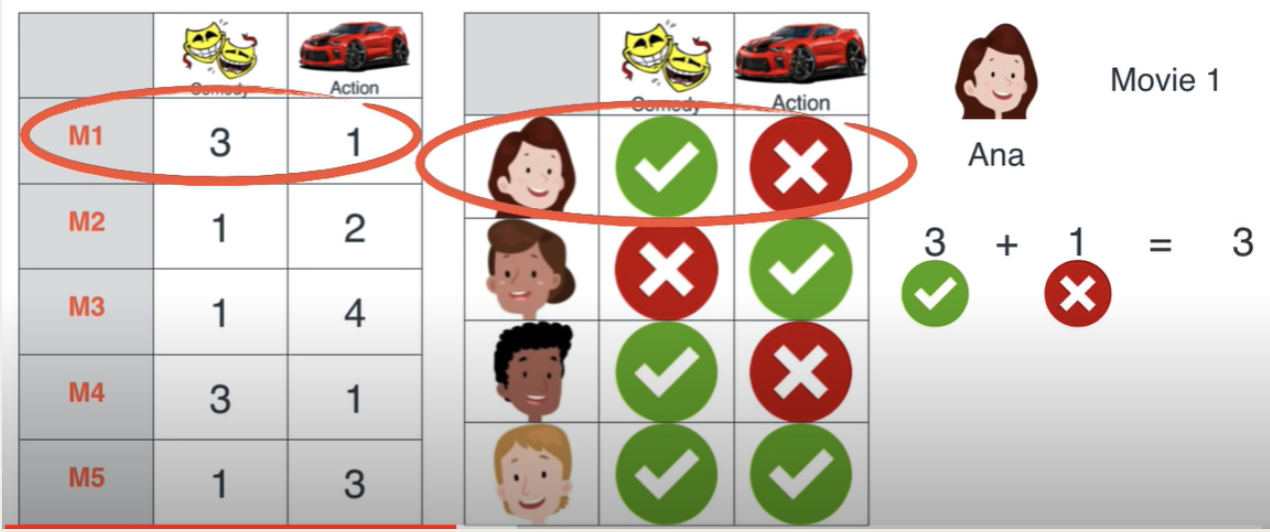

We get a final rating matrix like so.

Basically, the right matrix can be factorized into the 2 left matrices

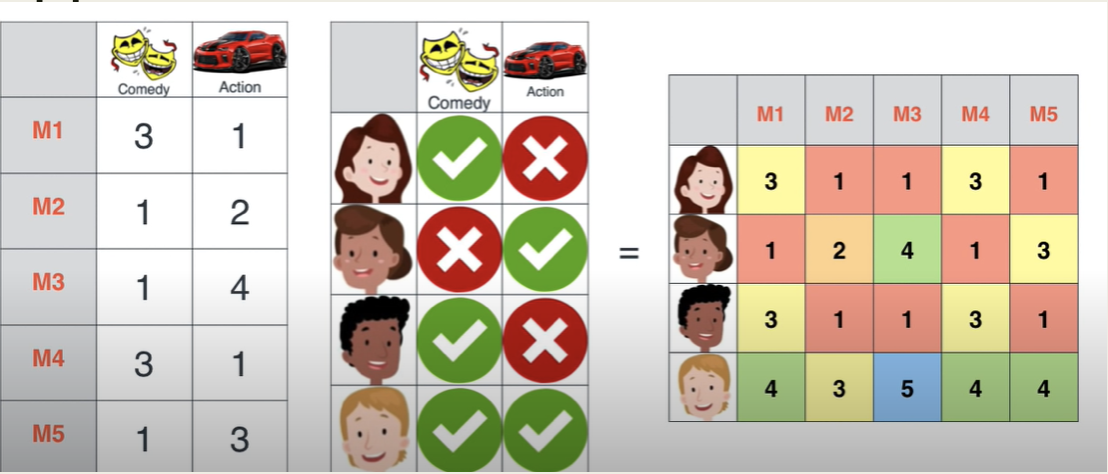


We need to get target matrix on right decomposed into 2 matrices
We need to find 2 matrices which when multiplied give us the target matrix
How do we do this?

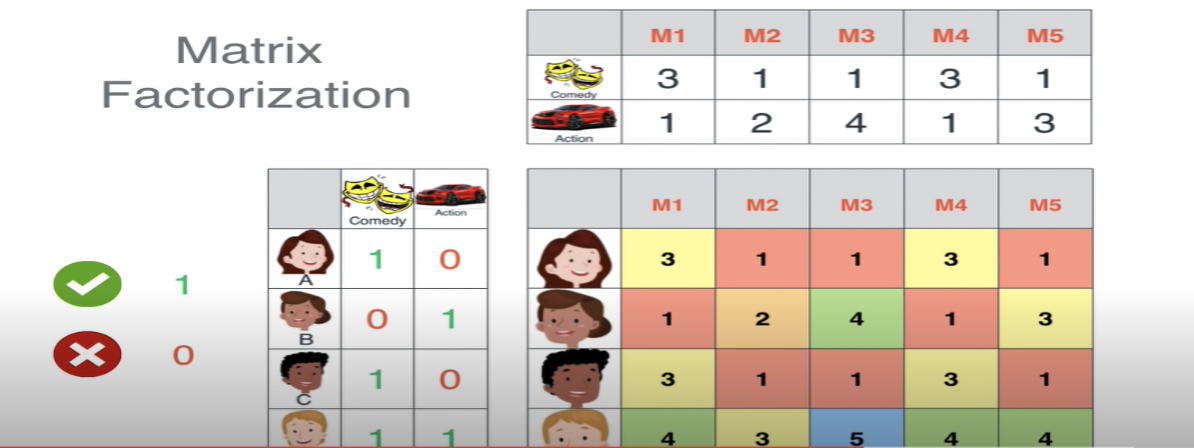

We get a final rating matrix like so.

Basically, the right matrix can be factorized into the 2 left matrices

We start with random matrices and use gradient descent to find right values to get the correct target matrix

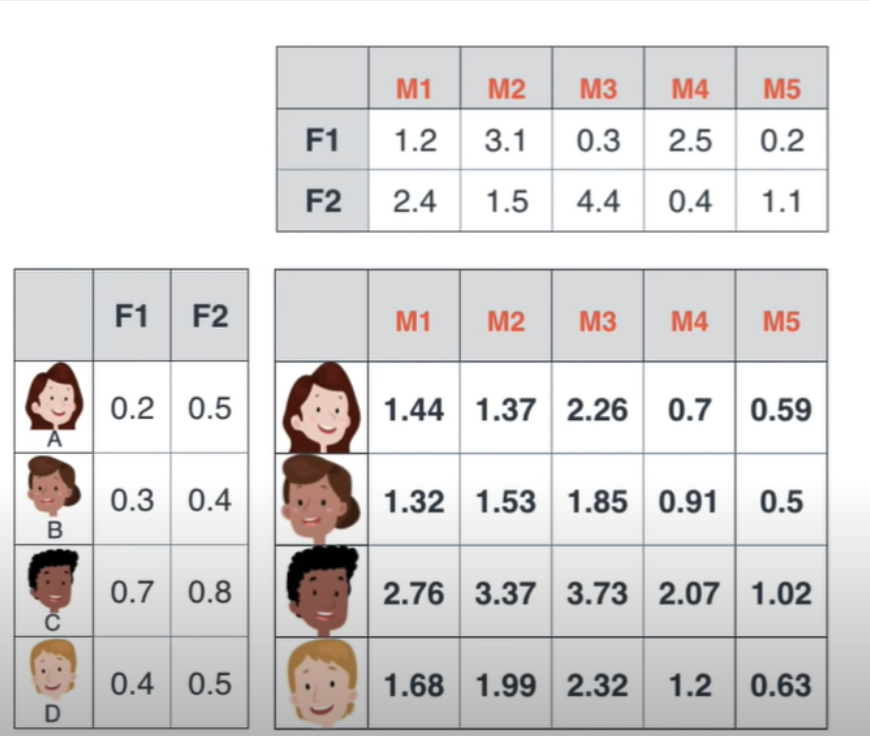

As you can see we get 1.44 instead of 3
This needs to be corrected.

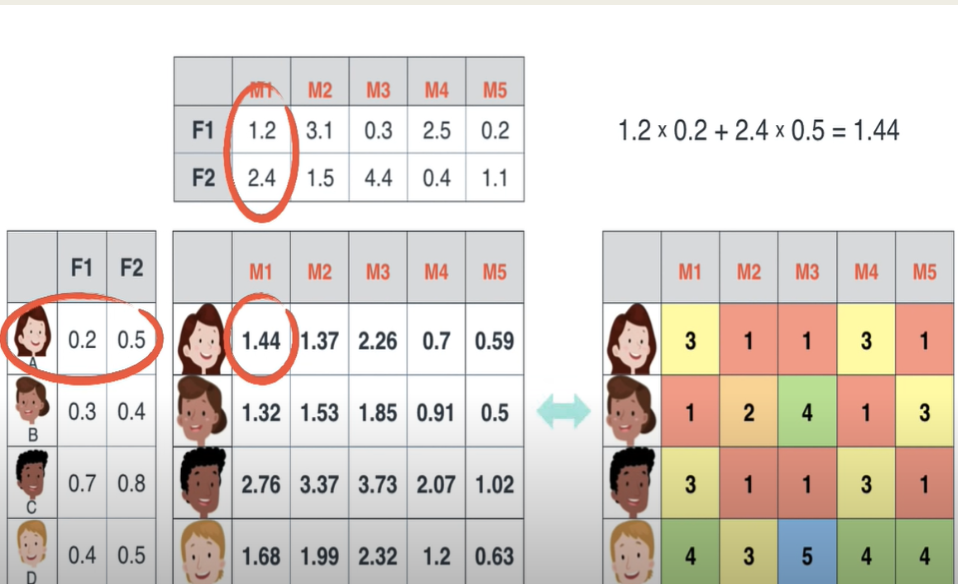

Gradient descent will update values in the non target matrices.
With enough iterations we will reach the right values.

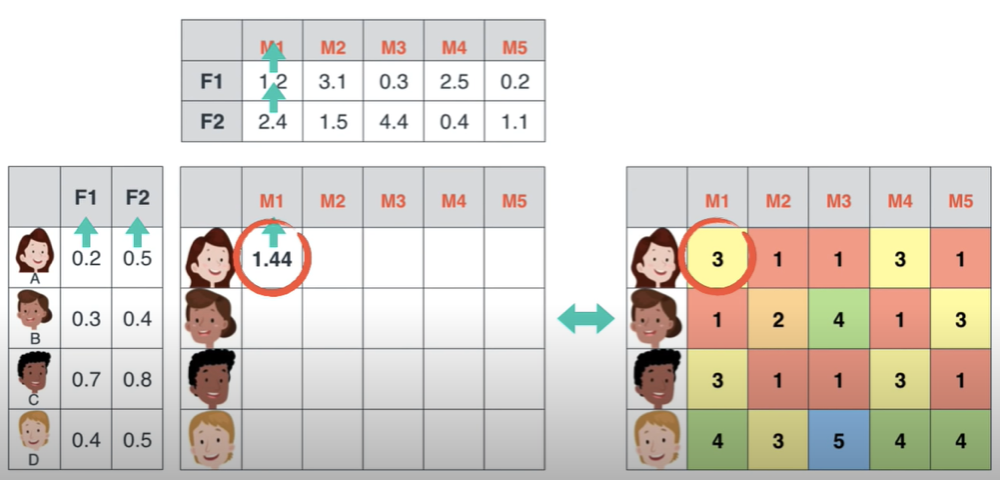

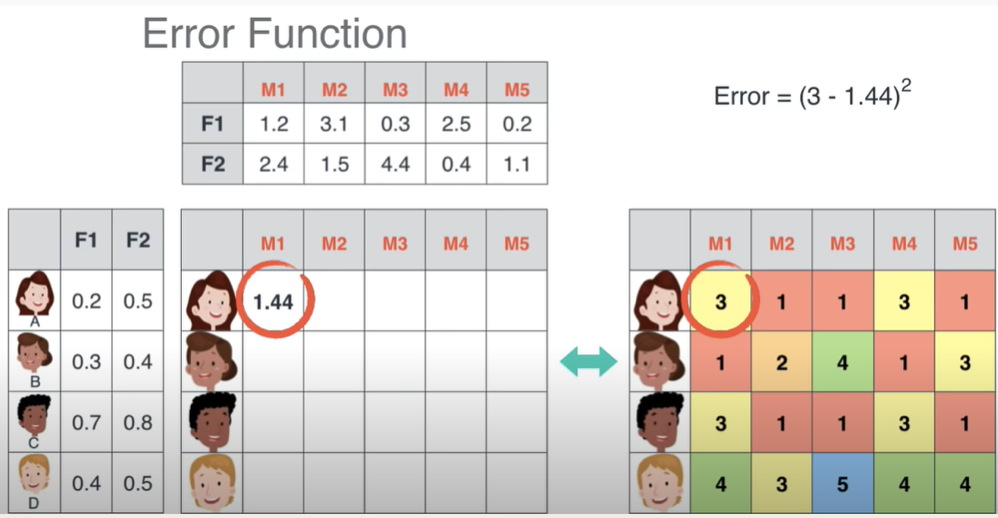

Same technique can be used to factorize empty target matrices as well.
Thus we get right factored matrices from random ones.
When multiplied these give ratings for all users.

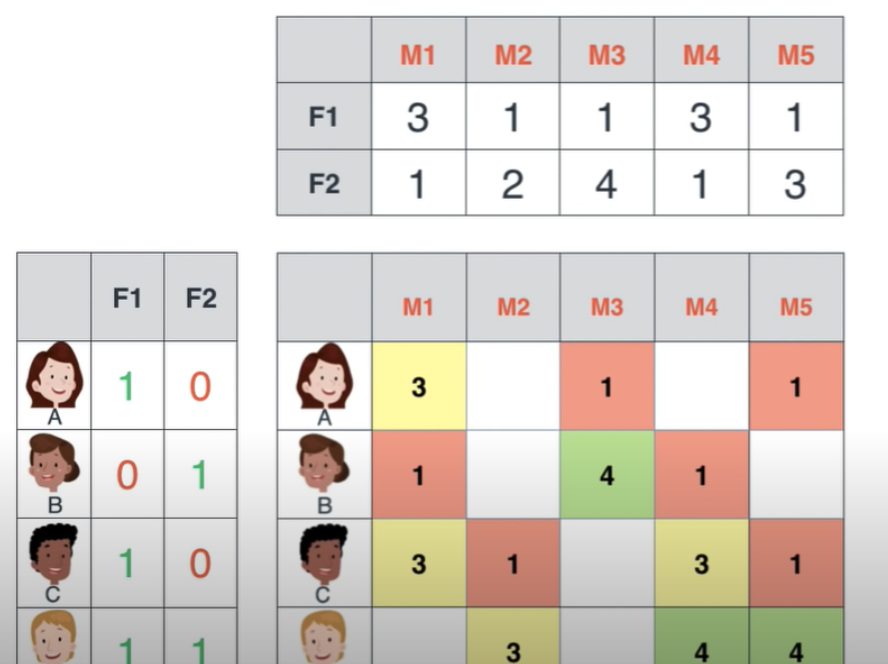

# Truncated SVD Demo

Performs linear dimensionality reduction by means of truncated singular value decomposition (SVD).  
This estimator does not center the data before computing the singular value decomposition. This means it can work with sparse matrices efficiently.

Missing values means matrix decomposition cannot happen naturally.
We thus use Machine Learning iterative approach to complete the missing values.
The filled values which are ratings for users if high, those movies can be recommended to a user.

Actual SVD works on filled data in matrices like PCA does. We are going to use Truncated SVD.

In [28]:
import pandas as pd 
import numpy as np
from scipy.sparse import csr_matrix as sparse_matrix
import os
from sklearn.decomposition import TruncatedSVD
from sklearn.neighbors import NearestNeighbors

In [78]:
movie_ratings = pd.read_csv('data/ratings.csv')
movie_ratings.head()

userId  movieId  rating  timestamp
0       1        1     4.0  964982703
1       1        3     4.0  964981247
2       1        6     4.0  964982224
3       1       47     5.0  964983815
4       1       50     5.0  964982931

In [79]:
import pandas as pd 
# to look up titles
movie_info = pd.read_csv('data/movies.csv', index_col=0)
movie_info.head()

title  \
movieId                                       
1                          Toy Story (1995)   
2                            Jumanji (1995)   
3                   Grumpier Old Men (1995)   
4                  Waiting to Exhale (1995)   
5        Father of the Bride Part II (1995)   

                                              genres  
movieId                                               
1        Adventure|Animation|Children|Comedy|Fantasy  
2                         Adventure|Children|Fantasy  
3                                     Comedy|Romance  
4                               Comedy|Drama|Romance  
5                                             Comedy

In [80]:
def get_stats(ratings, item_key="item", user_key="user"):
    print("Number of ratings:", len(ratings))
    print("The average rating:", np.mean(ratings["rating"]))

    n = len(set(ratings[item_key]))
    d = len(set(ratings[user_key]))
    print("Number of users:", d)
    #print("Number of items:", n)
    print("Fraction nonzero:", len(ratings)/(n*d))
    print("Size of full X matrix (GB):", (n*d)*8/1e9)

    return n,d

In [54]:
def create_X(ratings, n, d, user_key="user", item_key="item"):
    """
    Creates a sparse matrix using scipy.csr_matrix and mappers to relate indexes to items' id.
    
    Parameters:
    -----------
    ratings: the ratings to be stored in the matrix;
    n: the number of items
    d: the number of users
    user_key: the column in the pandas dataframe that contains the users id
    item_key: the column in the pandas dataframe that contains the items id
    
    Returns: (X, user_mapper, item_mapper, user_inverse_mapper, item_inverse_mapper, user_ind, item_ind)
    --------
    X: the sparse matrix containing the ratings. Note that
    user_mapper: stores the indexes of the users - the user_id is the key;
    item_mapper: stores the indexes of the items - the item_id is the key;
    user_inverse_mapper: stores the user id - the user index is the key;
    item_inverse_mapper: stores the item id - the item index is the key;
    user_ind: indexes of the users;
    item_ind: indexes of the items;
    """
    
    user_mapper = dict(zip(np.unique(ratings[user_key]), list(range(d))))
    item_mapper = dict(zip(np.unique(ratings[item_key]), list(range(n))))

    user_inverse_mapper = dict(zip(list(range(d)), np.unique(ratings[user_key])))
    item_inverse_mapper = dict(zip(list(range(n)), np.unique(ratings[item_key])))

    user_ind = [user_mapper[i] for i in ratings[user_key]]
    item_ind = [item_mapper[i] for i in ratings[item_key]]

    X = sparse_matrix((ratings["rating"], (item_ind, user_ind)), shape=(n,d))
    
    return X, user_mapper, item_mapper, user_inverse_mapper, item_inverse_mapper, user_ind, item_ind

In [55]:
def find_nearestneighbour(model, X, query_ind):
    
    model.fit(X)
    if X[query_ind].ndim==2:
        neighbors_idx = model.kneighbors(X[query_ind], return_distance=False).ravel()
    else: 
        neighbors_idx = model.kneighbors(X[query_ind][None], return_distance=False).ravel()
    
    return np.delete(neighbors_idx, np.where(neighbors_idx==query_ind))

In [56]:
def print_movie_pop(nn):
    movies = [movie_inverse_mapper[z] for z in nn]
    pop = np.sum(movie_X[nn], axis=1) 
    for i in range(0,5):
        print(f"\t{movie_info.loc[movies[i],'title']:50} Total stars: {pop[i,0]}")

In [57]:
movie_n, movie_d = get_stats(movie_ratings, user_key="userId", item_key="movieId")

Number of ratings: 100836
The average rating: 3.501556983616962
Number of users: 610
Fraction nonzero: 0.016999683055613623
Size of full X matrix (GB): 0.04745312


In [65]:
movie_X, user_mapper, movie_mapper, user_inverse_mapper, movie_inverse_mapper, user_ind, movie_ind = create_X(movie_ratings, movie_n, movie_d, user_key="userId", item_key="movieId")


In [74]:
nn_euc = find_nearestneighbour(NearestNeighbors(n_neighbors=6), movie_X, 0)
nn_euc


array([2353,  546,  615, 1756,  622], dtype=int64)

In [70]:
toy_story_ind = 0
toy_story_vec = movie_X[toy_story_ind]

In [73]:
for k in [10, 100, 500]:
    print("\n\n")
    movie_svd = TruncatedSVD(n_components=k)
    Z = movie_svd.fit_transform(movie_X)
    nn_svd = find_nearestneighbour(NearestNeighbors(n_neighbors=50), Z, 0)

    print(f"SVD(k={k}): ")
    print_movie_pop(nn_svd) 
    
print("\n\n Euclidean:")
print_movie_pop(nn_euc)




(9724, 10)
SVD(k=10): 
	Independence Day (a.k.a. ID4) (1996)               Total stars: 696.0
	Back to the Future (1985)                          Total stars: 690.5
	Jurassic Park (1993)                               Total stars: 892.5
	Aladdin (1992)                                     Total stars: 694.0
	Mission: Impossible (1996)                         Total stars: 573.0



(9724, 100)
SVD(k=100): 
	Toy Story 2 (1999)                                 Total stars: 374.5
	Independence Day (a.k.a. ID4) (1996)               Total stars: 696.0
	Mission: Impossible (1996)                         Total stars: 573.0
	Groundhog Day (1993)                               Total stars: 564.0
	Babe (1995)                                        Total stars: 467.5



(9724, 500)
SVD(k=500): 
	Toy Story 2 (1999)                                 Total stars: 374.5
	Mission: Impossible (1996)                         Total stars: 573.0
	Independence Day (a.k.a. ID4) (1996)               Total stars: 6